<a href="https://colab.research.google.com/github/DiKachura/pattern_recognition_audio/blob/main/feature_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Объединение данных в датасет**

In [6]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
def path_name(folder, dir_list):
  '''
  Возвращает путь к файлу.

  Args:
      folder (str): Путь к папке с файлами.
      dir_list (list): Список файлов.
  '''
  path = []
  for i in dir_list:
    path.append(folder + i)
  return path

In [8]:

SAVEE = '/content/drive/MyDrive/SAVEE/ALL/'
RAV = '/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24/'
TESS = "/content/drive/MyDrive/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
CREMA = "/content/drive/MyDrive/CREMA-D/AudioWAV/"
cars = '/content/drive/MyDrive/cars/'
VTS = '/content/drive/MyDrive/VTS/vehicle_type_sound_dataset/cutted_files/'
animals = '/content/drive/MyDrive/animals/'
cats = '/content/drive/MyDrive/cats_sound/'
dogs = '/content/drive/MyDrive/dog_sound/'
drones = '/content/drive/MyDrive/drones/'


In [9]:
savee_dir_list = os.listdir(SAVEE)
rav_dir_list = os.listdir(RAV)
tess_dir_list = os.listdir(TESS)
crema_dir_list = os.listdir(CREMA)
cars_dir_list = os.listdir(cars)
vts_dir_list = os.listdir(VTS)
animals_dir_list = os.listdir(animals)
cats_dir_list = os.listdir(cats)
dogs_dir_list = os.listdir(dogs)
drones_dir_list = os.listdir(drones)

In [10]:
savee_path = path_name(SAVEE, savee_dir_list)
crema_path = path_name(CREMA, crema_dir_list)
cars_path = path_name(cars, cars_dir_list)
vts_path = path_name(VTS, vts_dir_list)
animals_path = path_name(animals, animals_dir_list)
cats_path = path_name(cats, cats_dir_list)
dogs_path = path_name(dogs, dogs_dir_list)
drones_path = path_name(drones, drones_dir_list)

In [11]:
savee_data = pd.DataFrame(savee_path, columns=['path'])
savee_data['label'] = 'human'
savee_data

,path,label
0,/content/drive/MyDrive/SAVEE/ALL/DC_a03.wav,human
1,/content/drive/MyDrive/SAVEE/ALL/DC_a04.wav,human
2,/content/drive/MyDrive/SAVEE/ALL/DC_a01.wav,human
3,/content/drive/MyDrive/SAVEE/ALL/DC_a05.wav,human
4,/content/drive/MyDrive/SAVEE/ALL/DC_a02.wav,human
...,...,...
475,/content/drive/MyDrive/SAVEE/ALL/KL_su14.wav,human
476,/content/drive/MyDrive/SAVEE/ALL/KL_su09.wav,human
477,/content/drive/MyDrive/SAVEE/ALL/KL_su10.wav,human
478,/content/drive/MyDrive/SAVEE/ALL/KL_su11.wav,human


In [12]:
RAV = '/content/drive/MyDrive/RAVDESS/audio_speech_actors_01-24/'

dir_list = os.listdir(RAV)
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        path.append(RAV + i + '/' + f)
rav_data = pd.DataFrame(path, columns=['path'])
rav_data['label'] = 'human'
rav_data

,path,label
0,/content/drive/MyDrive/RAVDESS/audio_speech_ac...,human
1,/content/drive/MyDrive/RAVDESS/audio_speech_ac...,human
2,/content/drive/MyDrive/RAVDESS/audio_speech_ac...,human
3,/content/drive/MyDrive/RAVDESS/audio_speech_ac...,human
4,/content/drive/MyDrive/RAVDESS/audio_speech_ac...,human
...,...,...
1435,/content/drive/MyDrive/RAVDESS/audio_speech_ac...,human
1436,/content/drive/MyDrive/RAVDESS/audio_speech_ac...,human
1437,/content/drive/MyDrive/RAVDESS/audio_speech_ac...,human
1438,/content/drive/MyDrive/RAVDESS/audio_speech_ac...,human


In [13]:
TESS = "/content/drive/MyDrive/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"

dir_list = os.listdir(TESS)
path = []
for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        path.append(TESS + i + '/' + f)
tess_data = pd.DataFrame(path, columns=['path'])
tess_data['label'] = 'human'
tess_data

,path,label
0,/content/drive/MyDrive/TESS/TESS Toronto emoti...,human
1,/content/drive/MyDrive/TESS/TESS Toronto emoti...,human
2,/content/drive/MyDrive/TESS/TESS Toronto emoti...,human
3,/content/drive/MyDrive/TESS/TESS Toronto emoti...,human
4,/content/drive/MyDrive/TESS/TESS Toronto emoti...,human
...,...,...
2795,/content/drive/MyDrive/TESS/TESS Toronto emoti...,human
2796,/content/drive/MyDrive/TESS/TESS Toronto emoti...,human
2797,/content/drive/MyDrive/TESS/TESS Toronto emoti...,human
2798,/content/drive/MyDrive/TESS/TESS Toronto emoti...,human


In [14]:
crema_data = pd.DataFrame(crema_path, columns=['path'])
crema_data['label'] = 'human'
crema_data

,path,label
0,/content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...,human
1,/content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...,human
2,/content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...,human
3,/content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...,human
4,/content/drive/MyDrive/CREMA-D/AudioWAV/1079_T...,human
...,...,...
7437,/content/drive/MyDrive/CREMA-D/AudioWAV/1006_I...,human
7438,/content/drive/MyDrive/CREMA-D/AudioWAV/1006_I...,human
7439,/content/drive/MyDrive/CREMA-D/AudioWAV/1006_I...,human
7440,/content/drive/MyDrive/CREMA-D/AudioWAV/1006_I...,human


In [15]:
cars_data = pd.DataFrame(cars_path, columns=['path'])
cars_data['label'] = 'car'
cars_data

,path,label
0,/content/drive/MyDrive/cars/VehicleNoise798.wav,car
1,/content/drive/MyDrive/cars/VehicleNoise801.wav,car
2,/content/drive/MyDrive/cars/VehicleNoise8.wav,car
3,/content/drive/MyDrive/cars/VehicleNoise802_se...,car
4,/content/drive/MyDrive/cars/VehicleNoise802_se...,car
...,...,...
2919,/content/drive/MyDrive/cars/Nissan 2012 Murano...,car
2920,/content/drive/MyDrive/cars/Nissan 2012 Rogue ...,car
2921,/content/drive/MyDrive/cars/Nissan 2016 Maxima...,car
2922,/content/drive/MyDrive/cars/Nissan Altima 2.5 ...,car


In [16]:
vts_data = pd.DataFrame(vts_path, columns=['path'])
vts_data['label'] = 'car'
vts_data

,path,label
0,/content/drive/MyDrive/VTS/vehicle_type_sound_...,car
1,/content/drive/MyDrive/VTS/vehicle_type_sound_...,car
2,/content/drive/MyDrive/VTS/vehicle_type_sound_...,car
3,/content/drive/MyDrive/VTS/vehicle_type_sound_...,car
4,/content/drive/MyDrive/VTS/vehicle_type_sound_...,car
...,...,...
1700,/content/drive/MyDrive/VTS/vehicle_type_sound_...,car
1701,/content/drive/MyDrive/VTS/vehicle_type_sound_...,car
1702,/content/drive/MyDrive/VTS/vehicle_type_sound_...,car
1703,/content/drive/MyDrive/VTS/vehicle_type_sound_...,car


In [17]:
animals_data = pd.DataFrame(animals_path, columns=['path'])
animals_data['label'] = 'animal'
animals_data

,path,label
0,/content/drive/MyDrive/animals/78957_segment_6...,animal
1,/content/drive/MyDrive/animals/78957_segment_7...,animal
2,/content/drive/MyDrive/animals/78957_segment_8...,animal
3,/content/drive/MyDrive/animals/78957_segment_9...,animal
4,/content/drive/MyDrive/animals/78957_segment_1...,animal
...,...,...
1292,/content/drive/MyDrive/animals/78957_segment_1...,animal
1293,/content/drive/MyDrive/animals/78957_segment_2...,animal
1294,/content/drive/MyDrive/animals/78957_segment_3...,animal
1295,/content/drive/MyDrive/animals/78957_segment_4...,animal


In [18]:
cats_data = pd.DataFrame(cats_path, columns=['path'])
cats_data['label'] = 'animal'
cats_data

,path,label
0,/content/drive/MyDrive/cats_sound/audio_segmen...,animal
1,/content/drive/MyDrive/cats_sound/audio_segmen...,animal
2,/content/drive/MyDrive/cats_sound/audio_segmen...,animal
3,/content/drive/MyDrive/cats_sound/audio_segmen...,animal
4,/content/drive/MyDrive/cats_sound/audio_segmen...,animal
...,...,...
648,/content/drive/MyDrive/cats_sound/audio_segmen...,animal
649,/content/drive/MyDrive/cats_sound/audio_segmen...,animal
650,/content/drive/MyDrive/cats_sound/audio_segmen...,animal
651,/content/drive/MyDrive/cats_sound/audio_segmen...,animal


In [19]:
dogs_data = pd.DataFrame(dogs_path, columns=['path'])
dogs_data['label'] = 'animal'
dogs_data

,path,label
0,/content/drive/MyDrive/dog_sound/audio_segment...,animal
1,/content/drive/MyDrive/dog_sound/audio_segment...,animal
2,/content/drive/MyDrive/dog_sound/audio_segment...,animal
3,/content/drive/MyDrive/dog_sound/audio_segment...,animal
4,/content/drive/MyDrive/dog_sound/audio_segment...,animal
...,...,...
134,/content/drive/MyDrive/dog_sound/audio_segment...,animal
135,/content/drive/MyDrive/dog_sound/audio_segment...,animal
136,/content/drive/MyDrive/dog_sound/audio_segment...,animal
137,/content/drive/MyDrive/dog_sound/audio_segment...,animal


In [20]:
drones_data = pd.DataFrame(drones_path, columns=['path'])
drones_data['label'] = 'drone'
drones_data

,path,label
0,/content/drive/MyDrive/drones/1_segment_443.wav,drone
1,/content/drive/MyDrive/drones/1_segment_444.wav,drone
2,/content/drive/MyDrive/drones/1_segment_445.wav,drone
3,/content/drive/MyDrive/drones/1_segment_446.wav,drone
4,/content/drive/MyDrive/drones/1_segment_447.wav,drone
...,...,...
1763,/content/drive/MyDrive/drones/1_segment_438.wav,drone
1764,/content/drive/MyDrive/drones/1_segment_439.wav,drone
1765,/content/drive/MyDrive/drones/1_segment_440.wav,drone
1766,/content/drive/MyDrive/drones/1_segment_441.wav,drone


In [21]:
data = pd.concat([savee_data, rav_data, tess_data, crema_data, cars_data, vts_data, animals_data, cats_data, dogs_data, drones_data])
data

,path,label
0,/content/drive/MyDrive/SAVEE/ALL/DC_a03.wav,human
1,/content/drive/MyDrive/SAVEE/ALL/DC_a04.wav,human
2,/content/drive/MyDrive/SAVEE/ALL/DC_a01.wav,human
3,/content/drive/MyDrive/SAVEE/ALL/DC_a05.wav,human
4,/content/drive/MyDrive/SAVEE/ALL/DC_a02.wav,human
...,...,...
1763,/content/drive/MyDrive/drones/1_segment_438.wav,drone
1764,/content/drive/MyDrive/drones/1_segment_439.wav,drone
1765,/content/drive/MyDrive/drones/1_segment_440.wav,drone
1766,/content/drive/MyDrive/drones/1_segment_441.wav,drone


In [22]:
data['label'].value_counts()

label
human     12162
car        4629
animal     2089
drone      1768
Name: count, dtype: int64

**Анализ аудиоданных**

In [89]:
audio_data = '/content/drive/MyDrive/drones/1_segment_1.wav'

audio_data_human = '/content/drive/MyDrive/SAVEE/ALL/DC_a01.wav'

audio_data_animals = '/content/drive/MyDrive/animals/23301_segment_1.wav'

audio_data_cars = '/content/drive/MyDrive/cars/2008 Ford Edge Engine knocking..wav'

In [90]:
y, sr = librosa.load(audio_data)
print(y.shape, sr)

y_human, sr_human = librosa.load(audio_data_human)
print(y_human.shape, sr_human)

y_animals, sr_animals = librosa.load(audio_data_animals)
print(y_animals.shape, sr_animals)

y_cars, sr_cars = librosa.load(audio_data_cars)
print(y_cars.shape, sr_cars)

(110250,) 22050
(80434,) 22050
(110250,) 22050
(110250,) 22050


In [91]:
print(y, sr)

[ 0.          0.          0.         ... -0.09151709 -0.11802022
 -0.18545589] 22050


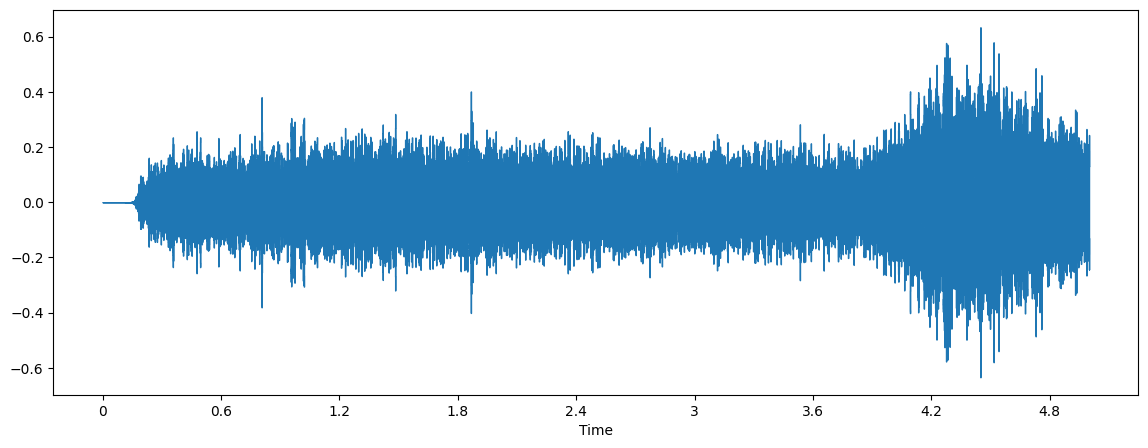

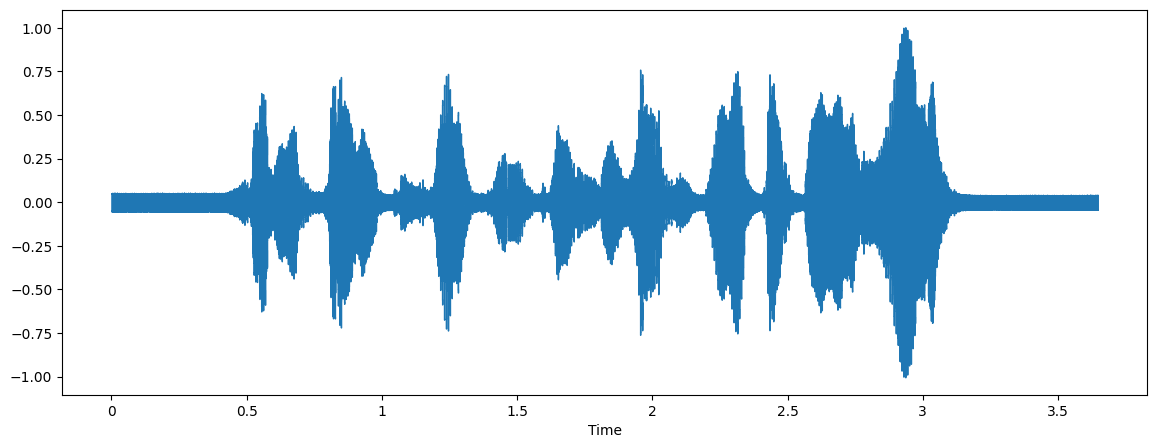

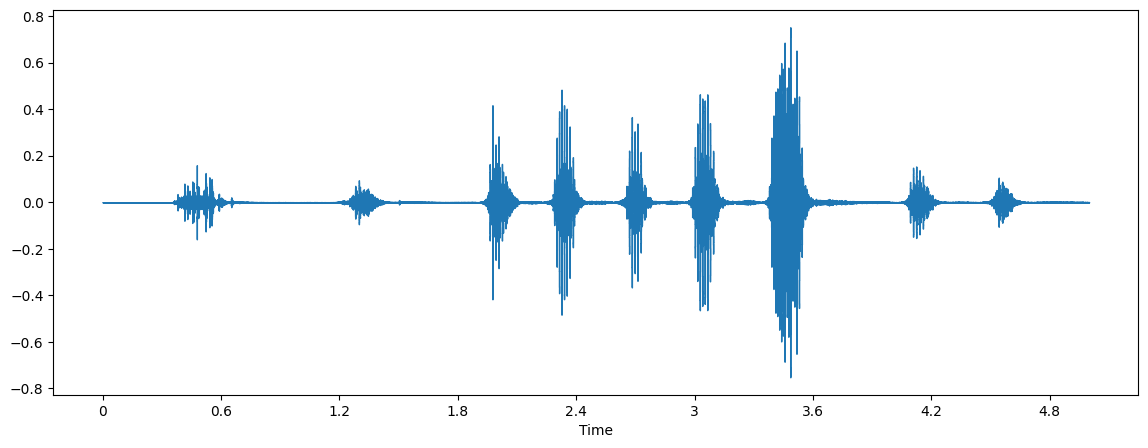

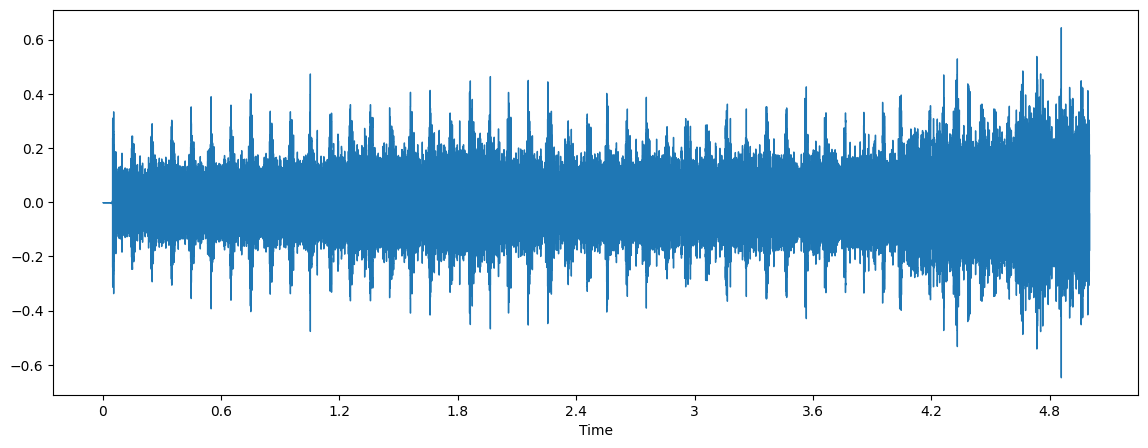

In [108]:
def load_audio(y, sr, audio_data):
  plt.figure(figsize=(14, 5))
  librosa.display.waveshow(y, sr=sr)
  ipd.Audio(audio_data)

load_audio(y, sr, audio_data)
load_audio(y_human, sr_human, audio_data_human)
load_audio(y_animals, sr_animals, audio_data_animals)
load_audio(y_cars, sr_cars, audio_data_cars)

**Разделение гармонических (тональных ) и ударных (переходных) сигналов на две формы волны:**

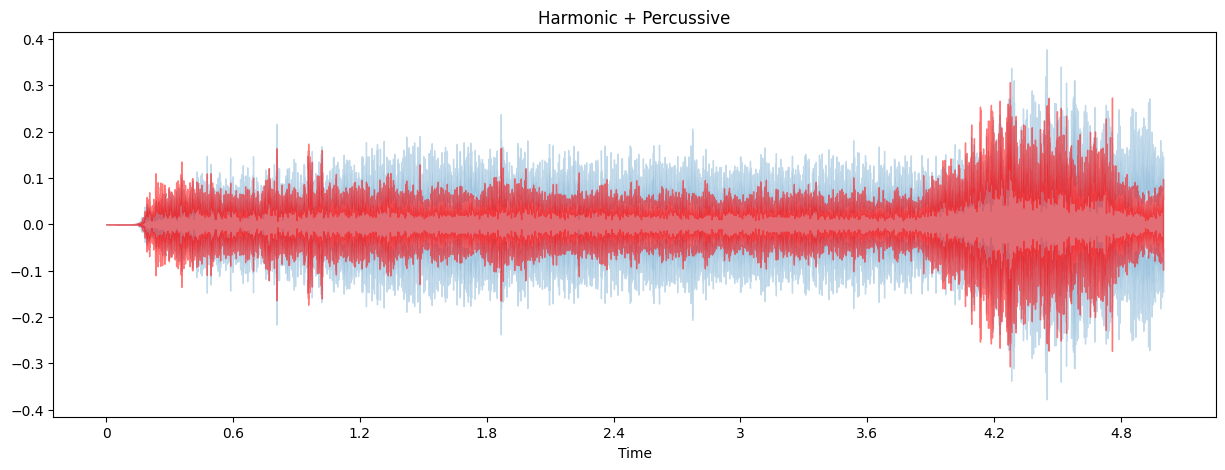

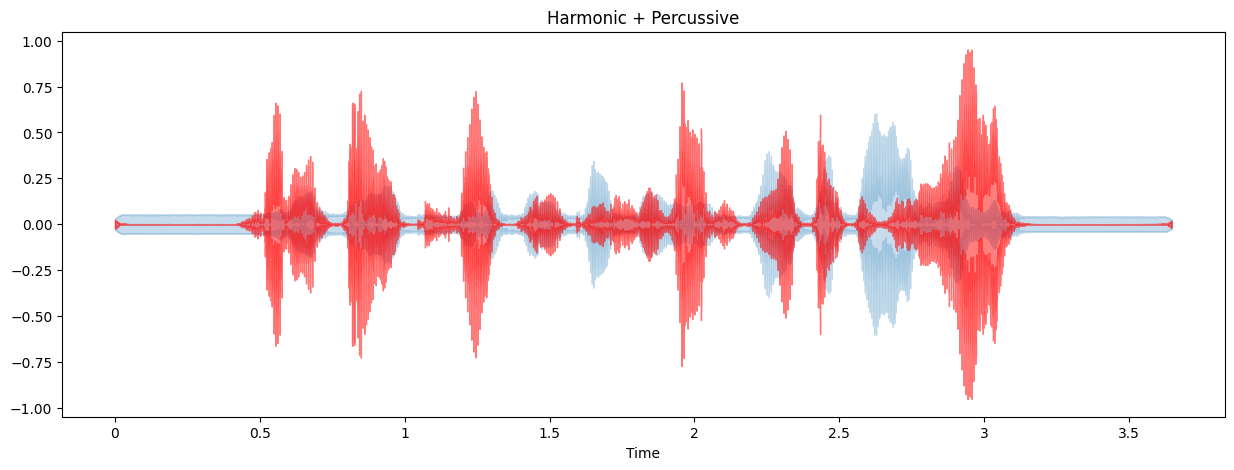

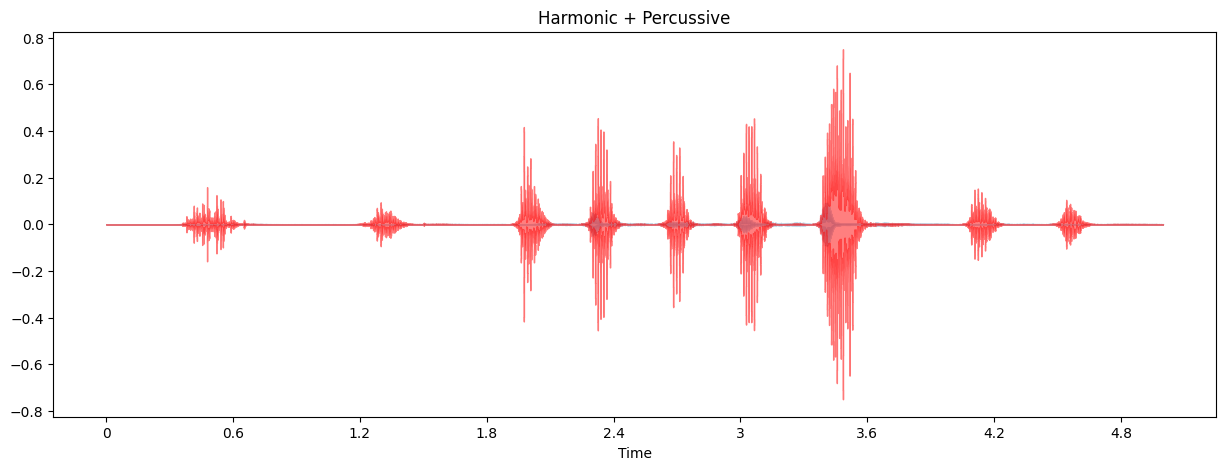

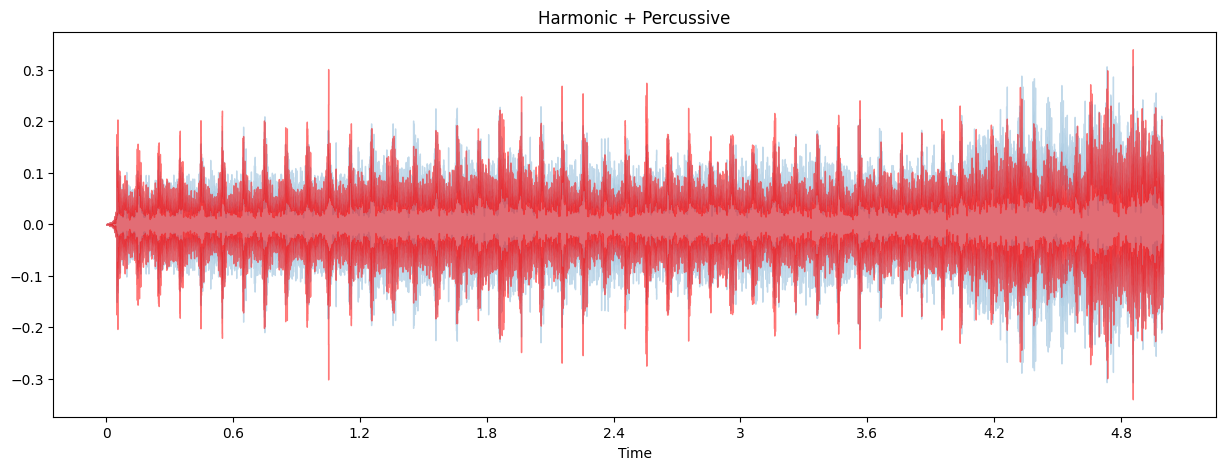

In [109]:
def print_harmonic_percussive(y, sr):
  y_harmonic, y_percussive = librosa.effects.hpss(y)
  plt.figure(figsize=(15, 5))
  librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
  librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
  plt.title('Harmonic + Percussive')

print_harmonic_percussive(y, sr)
print_harmonic_percussive(y_human, sr_human)
print_harmonic_percussive(y_animals, sr_animals)
print_harmonic_percussive(y_cars, sr_cars)

Результатом является то, что временной ряд y был разделен на два временных ряда, содержащих гармоническую и перкуссионную части сигнала. Каждый из y_harmonic и y_percussive имеет ту же форму и продолжительность, что и y.

**Нормализованная энергия цветности - Chroma Energy Normalized (CENS)**

Функции цветности основаны на двенадцати атрибутах написания основного тона, как используется в западной нотной записи, где каждый вектор цветности указывает, как энергия в кадре сигнала распределяется по двенадцати полосам цветности. Измерение таких распределений во времени дает представление времени и цветности (или хромаграмму ), которое тесно коррелирует с мелодической и гармонической прогрессией. Такие последовательности часто схожи для разных записей одного и того же. Нормализованная энергия цветности применяется для сопоставления звука, где допускаются вариации, поскольку они обычно появляются в разных исполнениях . Например, два разных исполнения одного и того же, могут демонстрировать значительные нелинейные глобальные и локальные различия в темпе, артикуляции и фразировке.

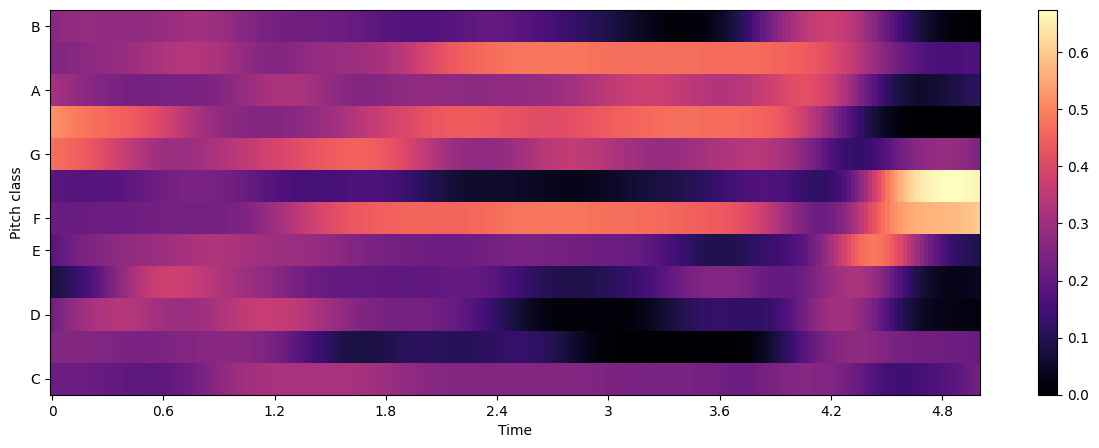

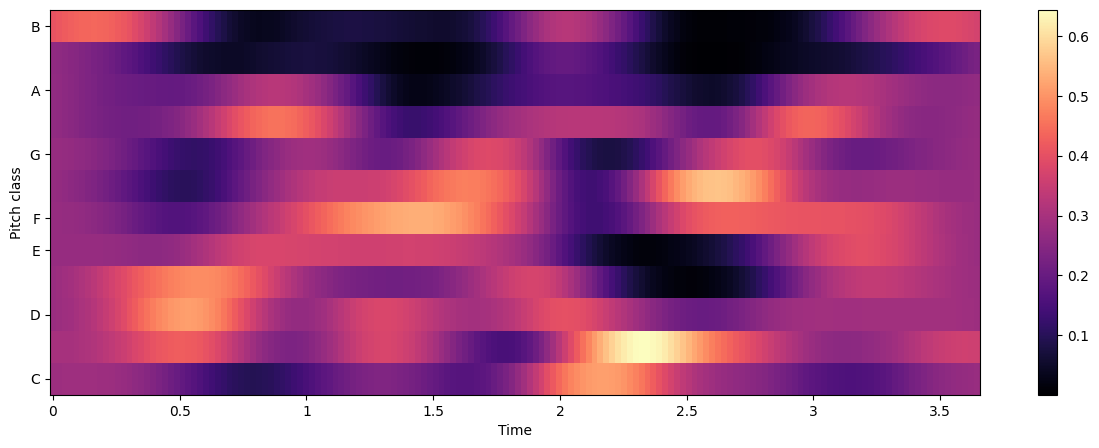

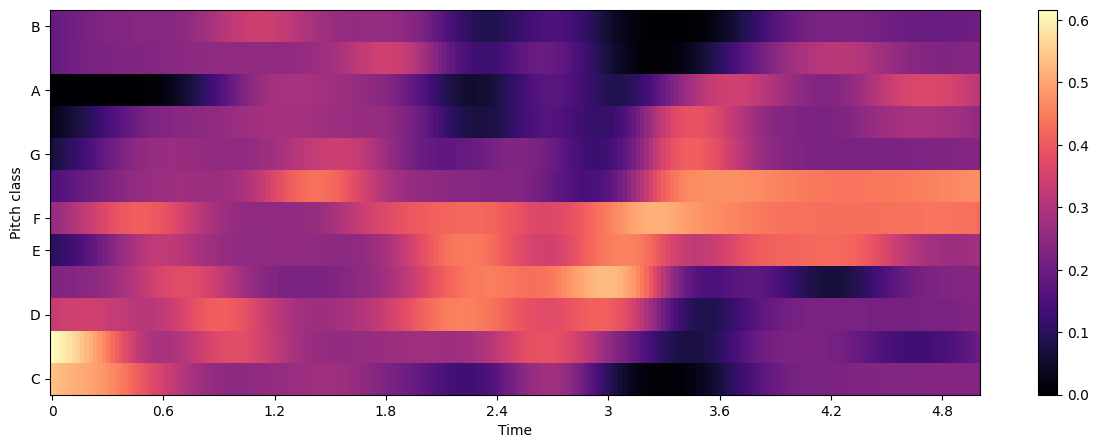

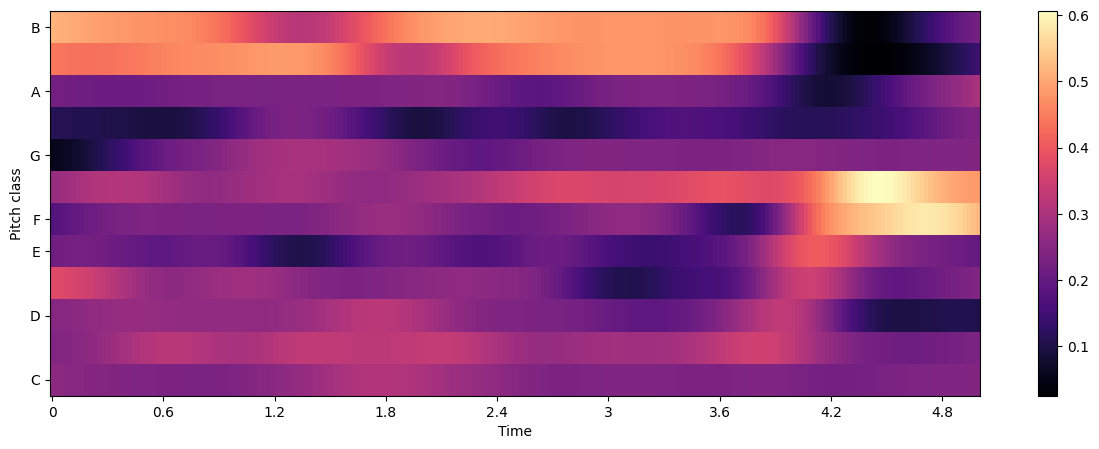

In [112]:
def plt_cens(y, sr):
  y_harmonic = librosa.effects.hpss(y)[0]
  chroma = librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
  plt.colorbar()

plt_cens(y, sr)
plt_cens(y_human, sr_human)
plt_cens(y_animals, sr_animals)
plt_cens(y_cars, sr_cars)

**Мел-кепстральные коэффициенты (MFCC).**

MFCC - Представляют собой набор признаков , которые описывают общую форму спектральной огибающей. Они моделируют характеристики человеческого голоса. MFCC - коэффициенты частотной капсулы, суммируют частотное распределение по размеру окна. Поэтому можно анализировать как частотные, так и временные характеристики звука. Перед построением графика коэффициенты нормализуются.

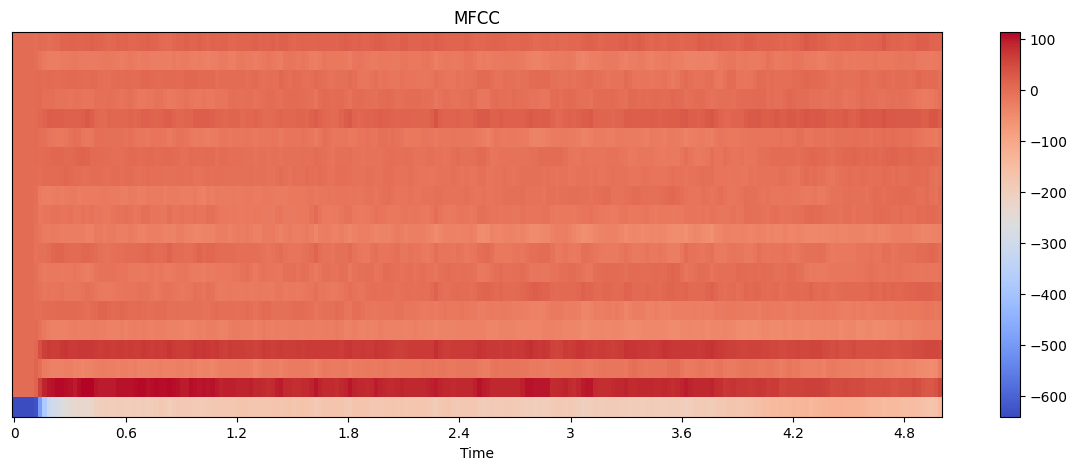

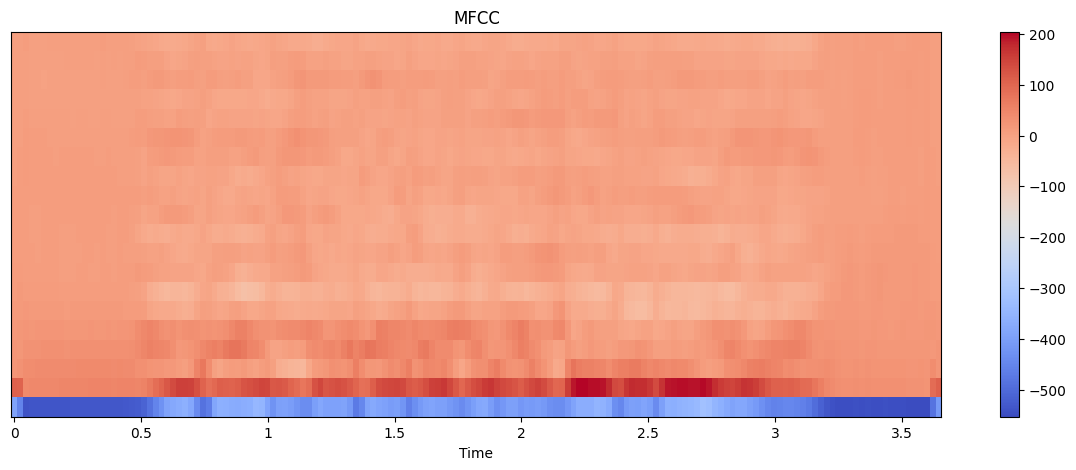

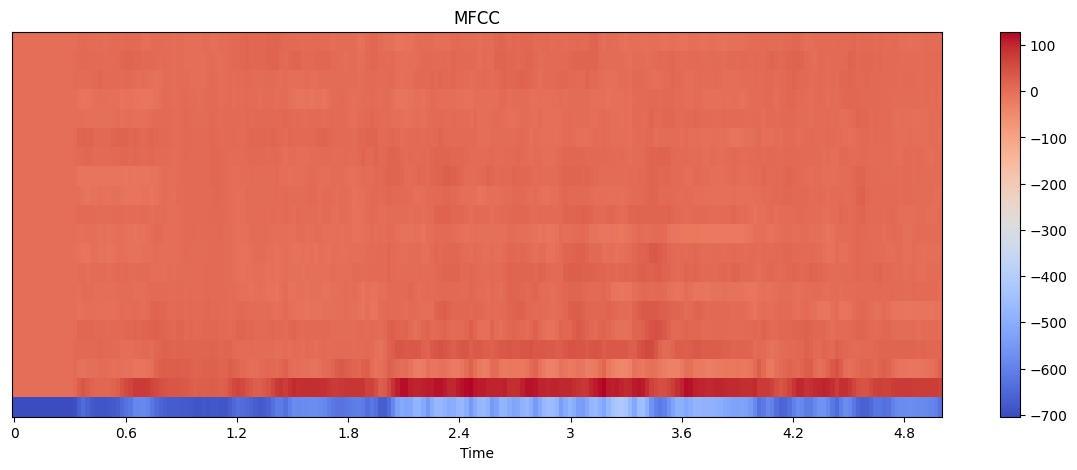

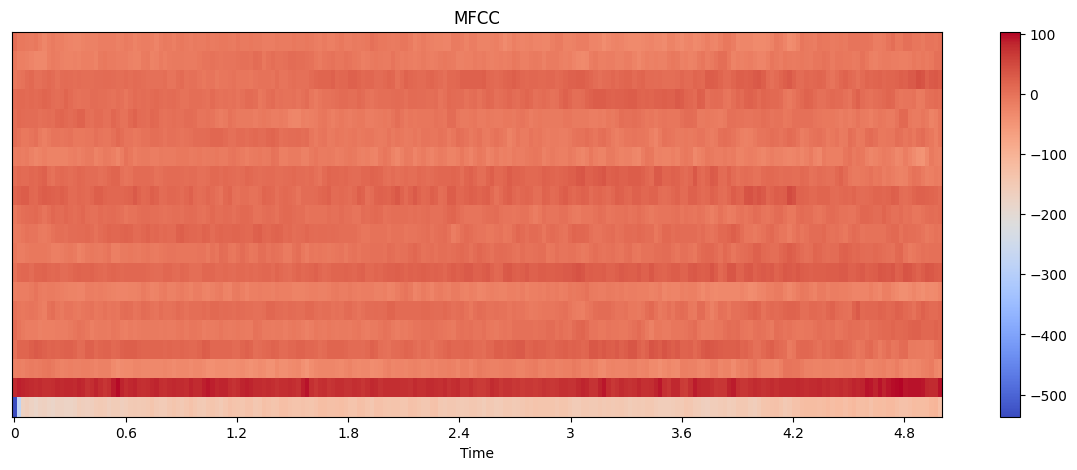

In [113]:
def plt_mfcc(y, sr):
  y_harmonic = librosa.effects.hpss(y)[0]
  mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(mfccs, x_axis='time')
  plt.colorbar()
  plt.title('MFCC')

plt_mfcc(y, sr)
plt_mfcc(y_human, sr_human)
plt_mfcc(y_animals, sr_animals)
plt_mfcc(y_cars, sr_cars)

**Спектрограмма**

Спектрограмма - это визуальный способ представления уровня или “громкости” сигнала во времени на различных частотах, присутствующих в форме волны. Обычно изображается в виде тепловой карты. .stft() преобразует данные в кратковременное преобразование Фурье. С помощью STFT можно определить амплитуду различных частот, воспроизводимых в данный момент времени аудиосигнала.

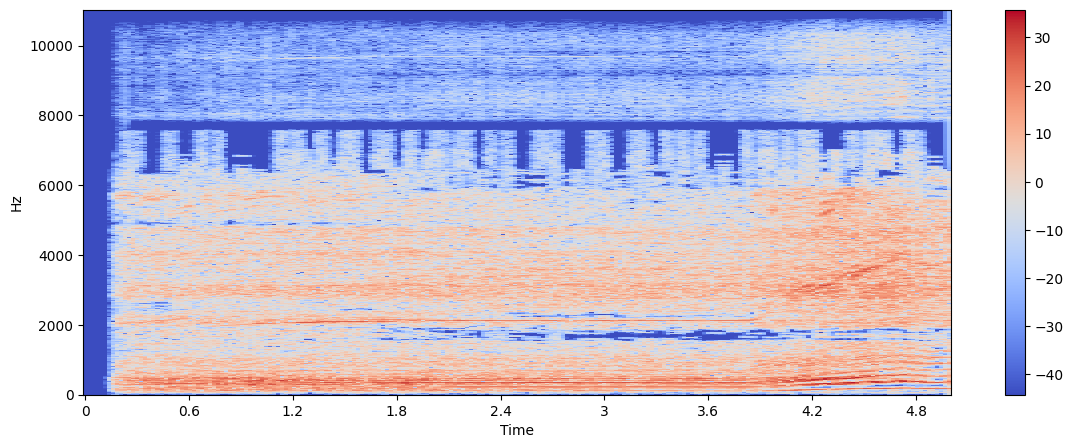

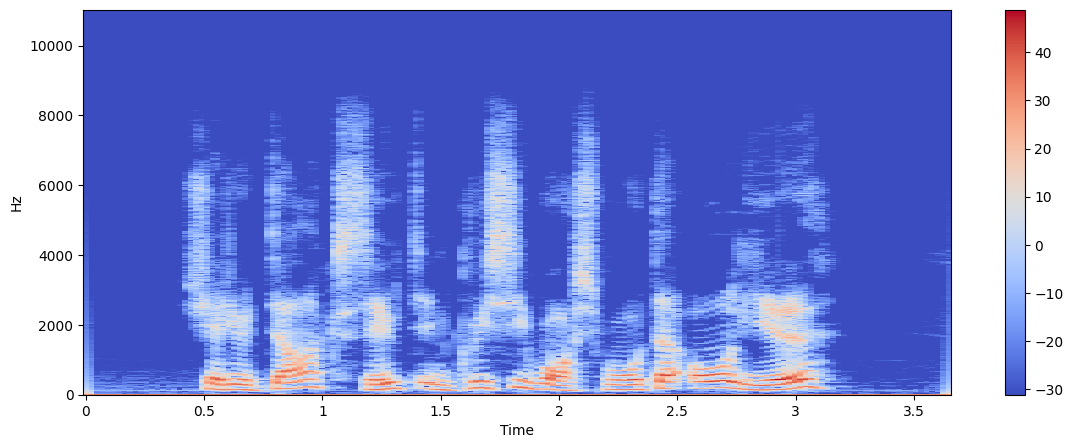

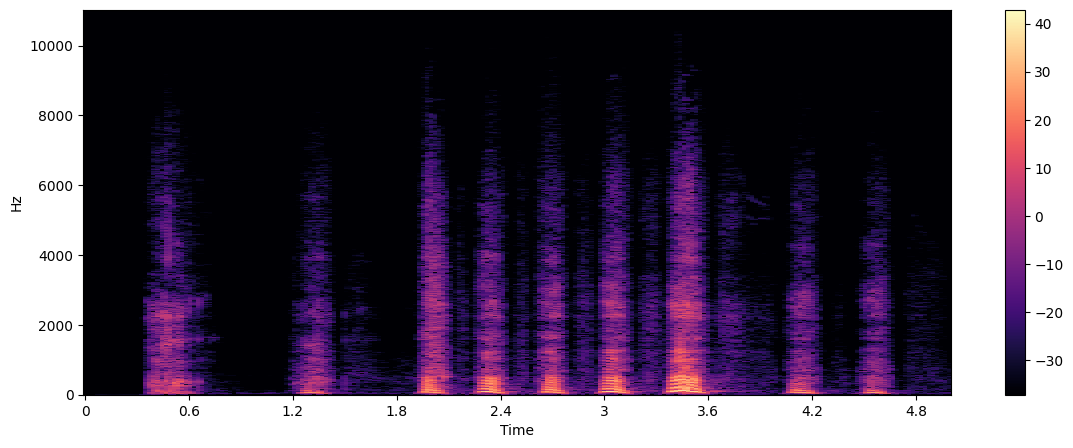

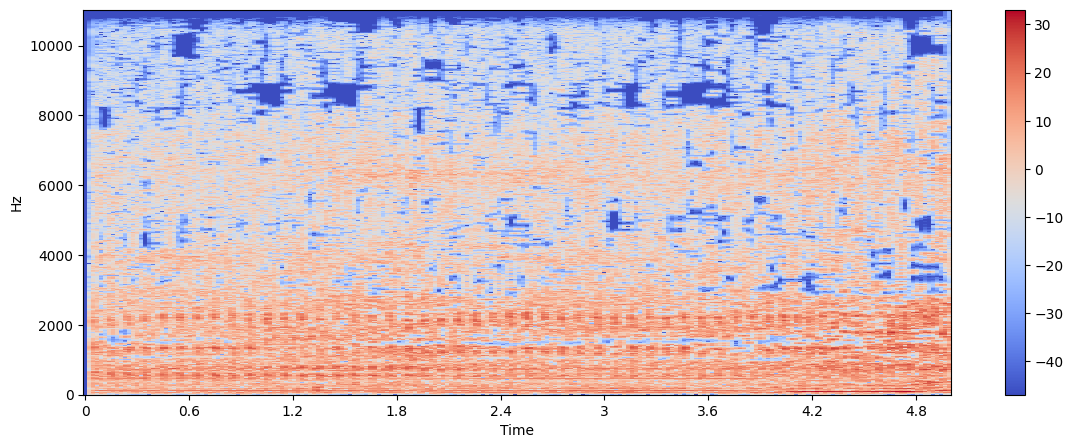

In [114]:
def spec(y, sr):
  X = librosa.stft(y)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

spec(y, sr)
spec(y_human, sr_human)
spec(y_animals, sr_animals)
spec(y_cars, sr_cars)

Поскольку все действие происходит в нижней части спектра, мы можем преобразовать ось частот в логарифмическую:

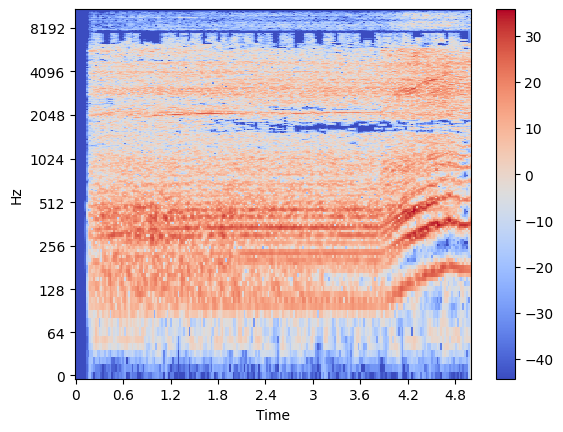

In [116]:
def log_spec(y, sr):
  X = librosa.stft(y)
  Xdb = librosa.amplitude_to_db(abs(X))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()

log_spec(y, sr)

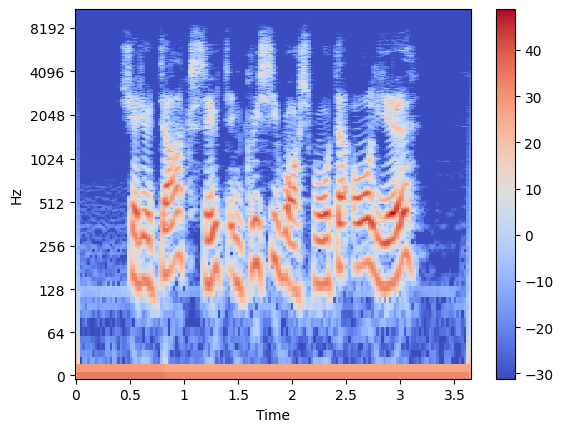

In [117]:
log_spec(y_human, sr_human)

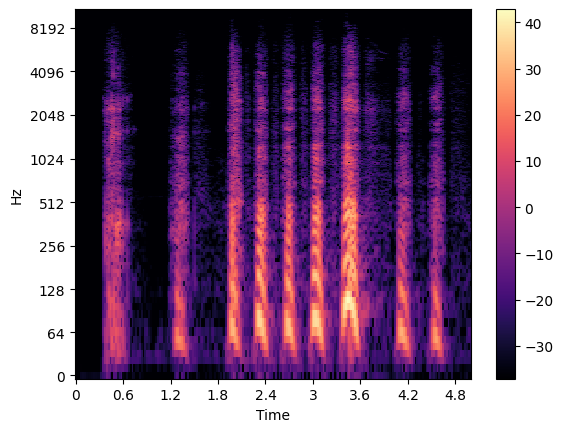

In [118]:
log_spec(y_animals, sr_animals)

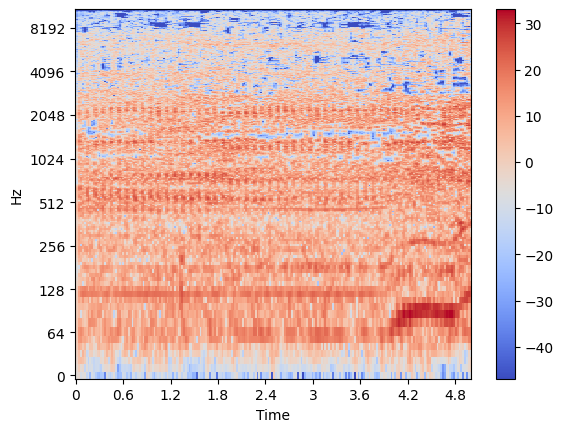

In [119]:
log_spec(y_cars, sr_cars)

**Спектральный центроид - Spectral Centroid.**

Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен “центр масс” для звука. librosa.feature.spectral_centroid вычисляет спектральный центроид для каждого фрейма в сигнале:

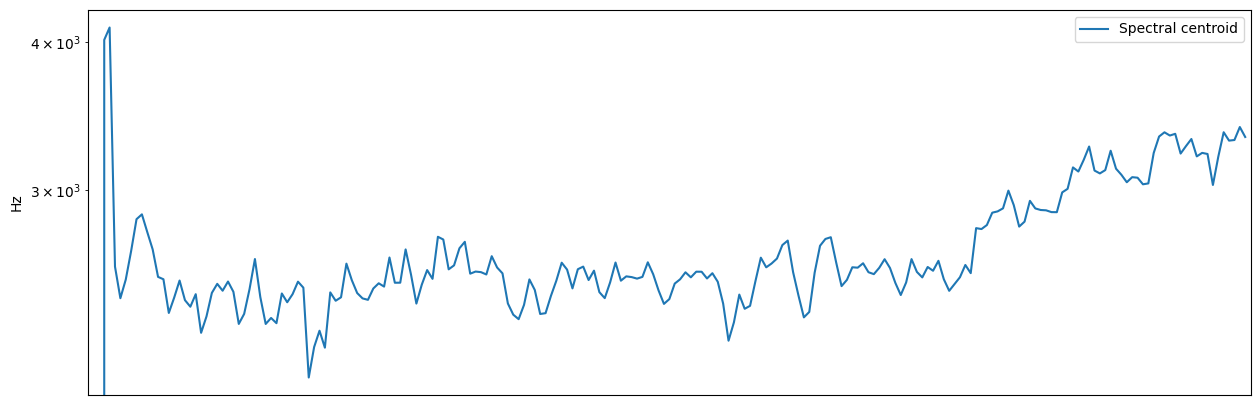

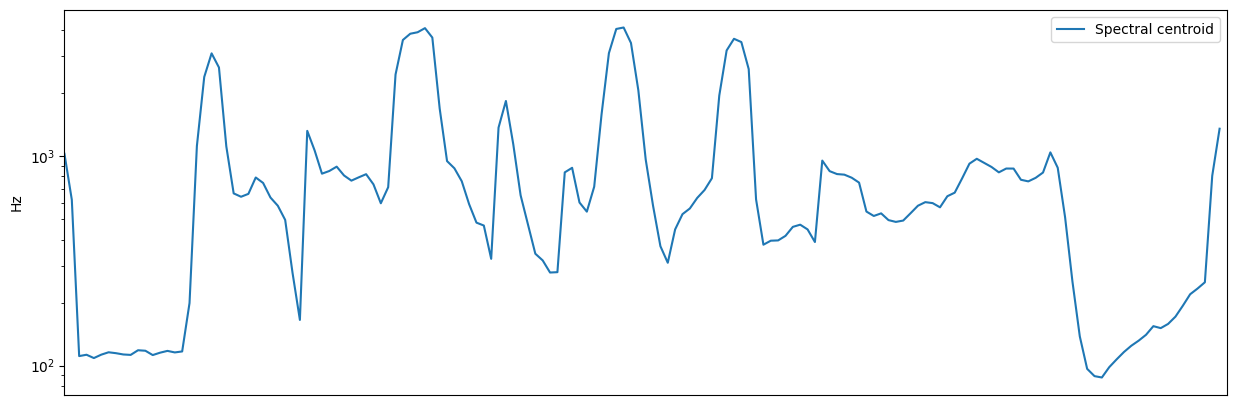

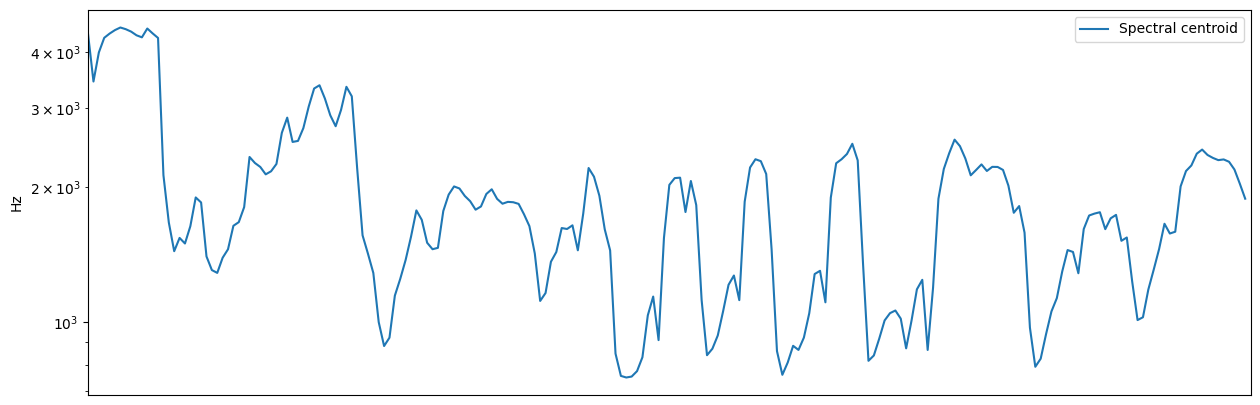

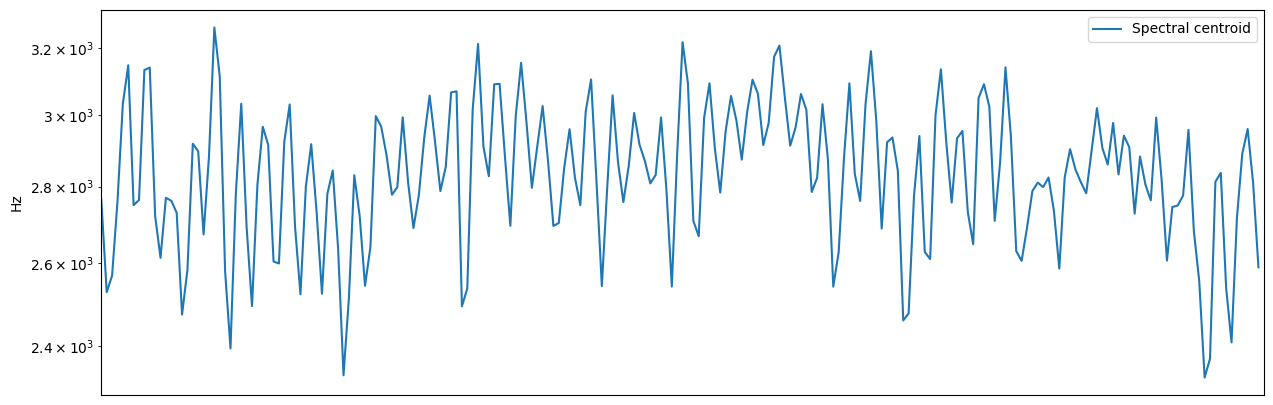

In [120]:
def plt_spectral_centroid(y, sr):
  cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  plt.figure(figsize=(15,5))
  plt.subplot(1, 1, 1)
  plt.semilogy(cent.T, label='Spectral centroid')
  plt.ylabel('Hz')
  plt.xticks([])
  plt.xlim([0, cent.shape[-1]])
  plt.legend()

plt_spectral_centroid(y, sr)
plt_spectral_centroid(y_human, sr_human)
plt_spectral_centroid(y_animals, sr_animals)
plt_spectral_centroid(y_cars, sr_cars)

**Спектральный контраст - Spectral Contrast**

Каждый кадр спектрограммы  S делится на поддиапазоны. Для каждого поддиапазона энергетический контраст оценивается путем сравнения средней энергии в верхнем квантиле (энергия пика) со средним значением энергии в нижнем квантиле (энергия впадины). Высокие значения контрастности обычно соответствуют четким узкополосным сигналам, а низкие значения контрастности соответствуют широкополосным шумам.

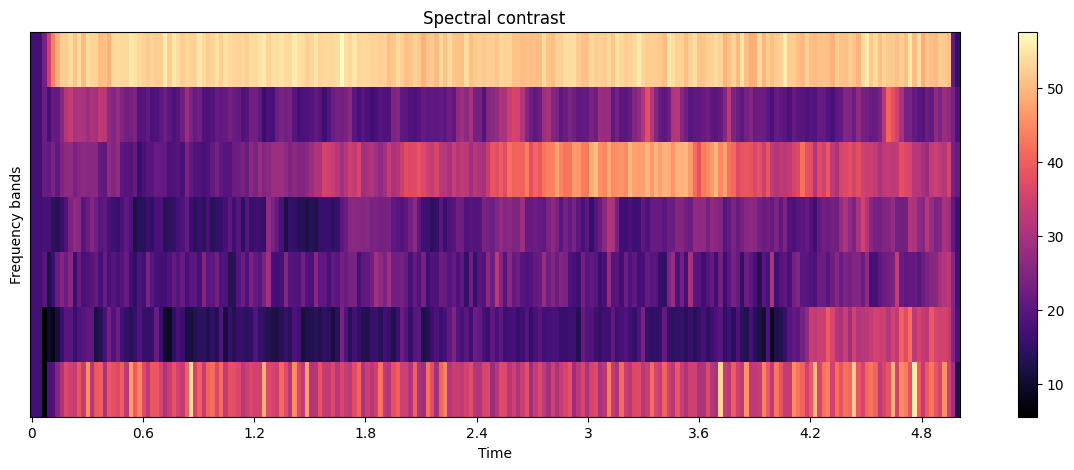

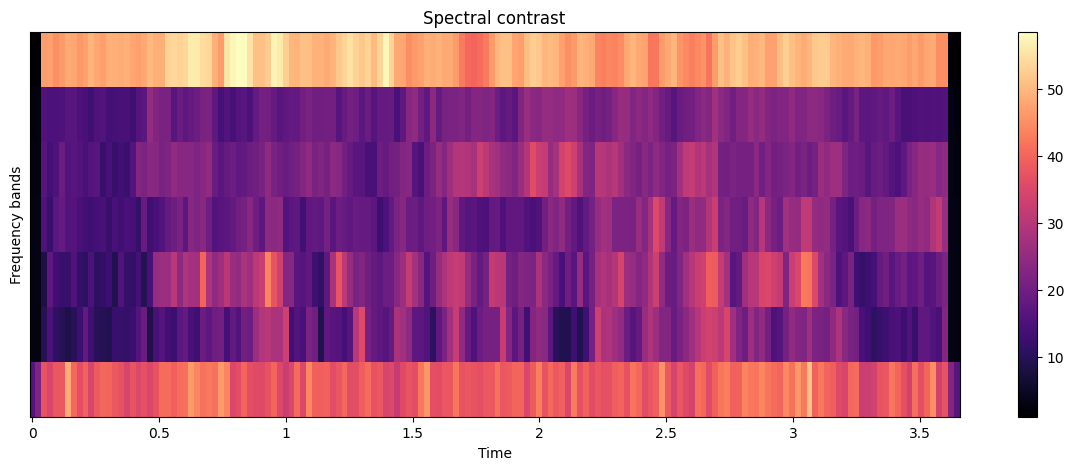

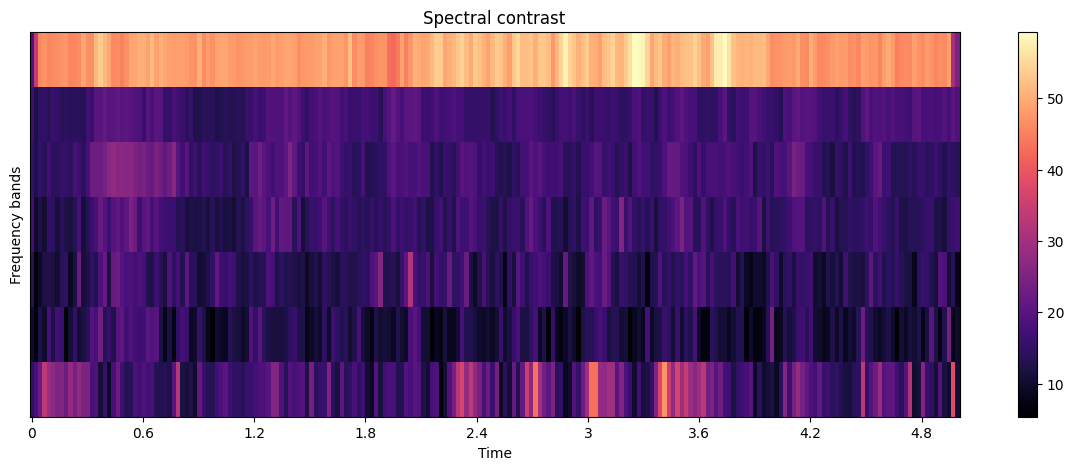

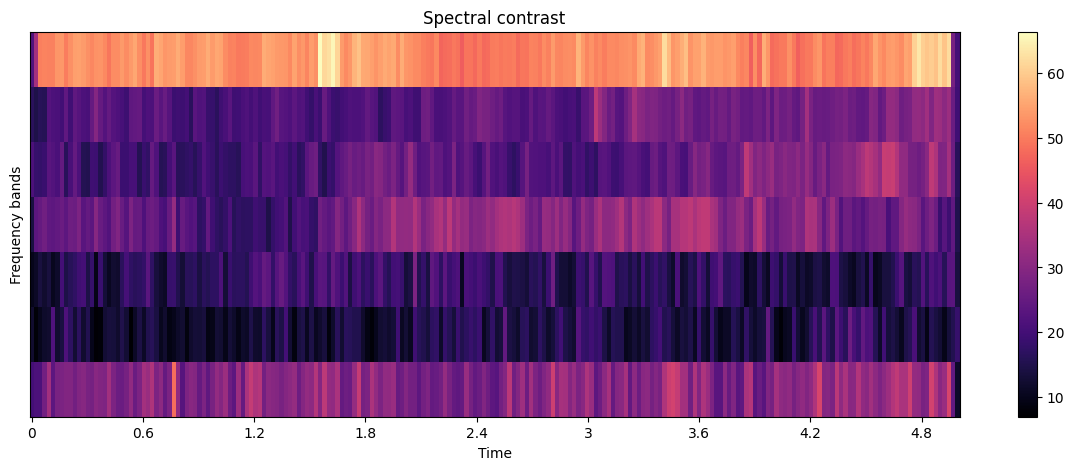

In [121]:
def plt_spectral_contrast(y, sr):
  y_harmonic = librosa.effects.hpss(y)[0]
  contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
  plt.figure(figsize=(15,5))
  librosa.display.specshow(contrast, x_axis='time')
  plt.colorbar()
  plt.ylabel('Frequency bands')
  plt.title('Spectral contrast')

plt_spectral_contrast(y, sr)
plt_spectral_contrast(y_human, sr_human)
plt_spectral_contrast(y_animals, sr_animals)
plt_spectral_contrast(y_cars, sr_cars)

**Спектральный спад - Spectral Rolloff.**

Это мера формы сигнала, представляющая собой частоту, в которой высокие частоты снижаются до 0. Чтобы получить ее, нужно рассчитать долю элементов в спектре мощности, где 85% ее мощности находится на более низких частотах. librosa.feature.spectral_rolloff вычисляет частоту спада для каждого фрейма в сигнале:

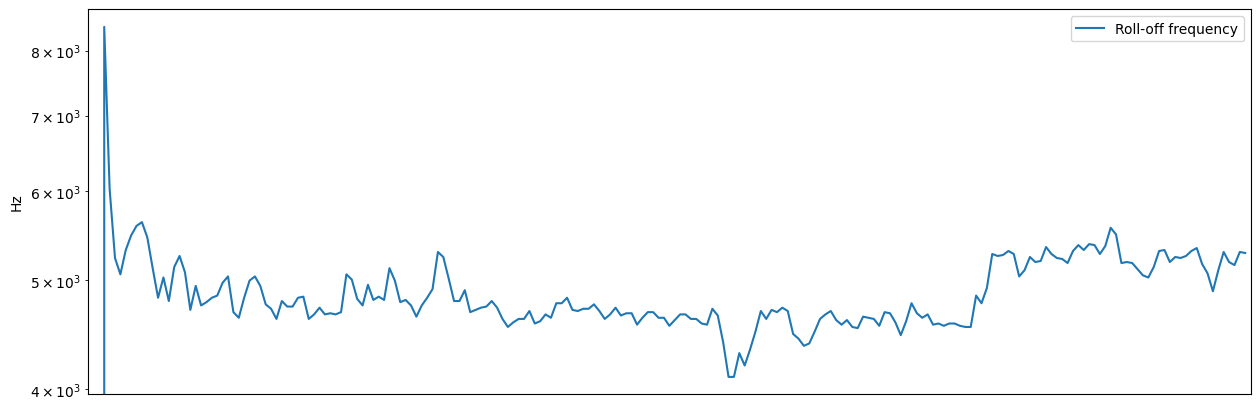

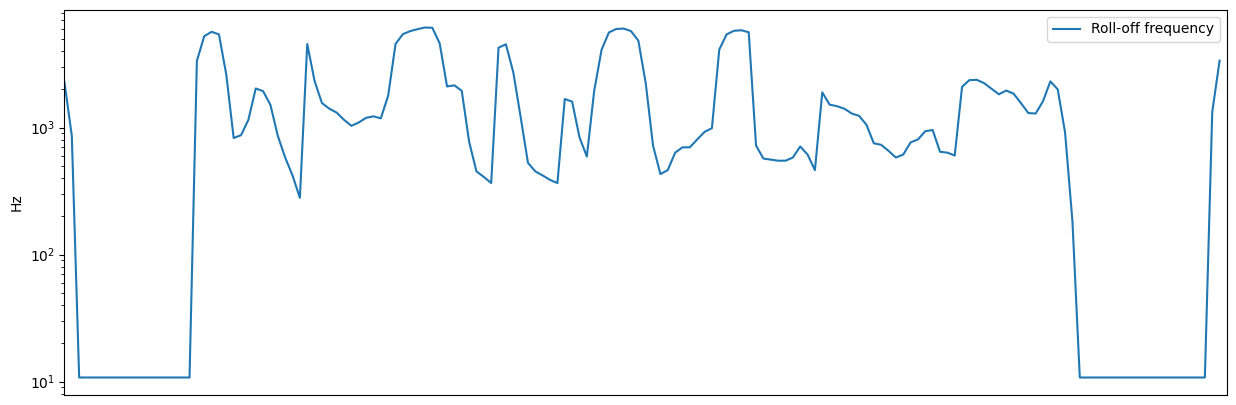

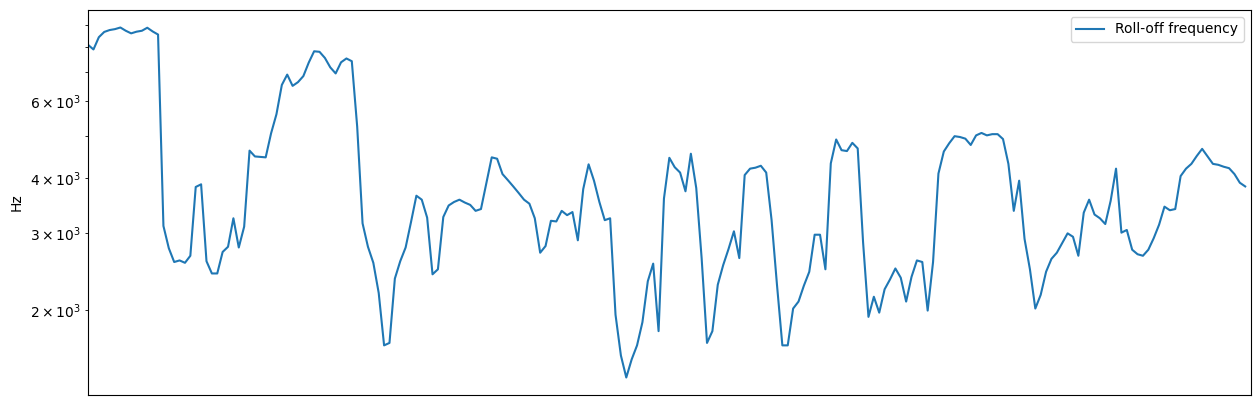

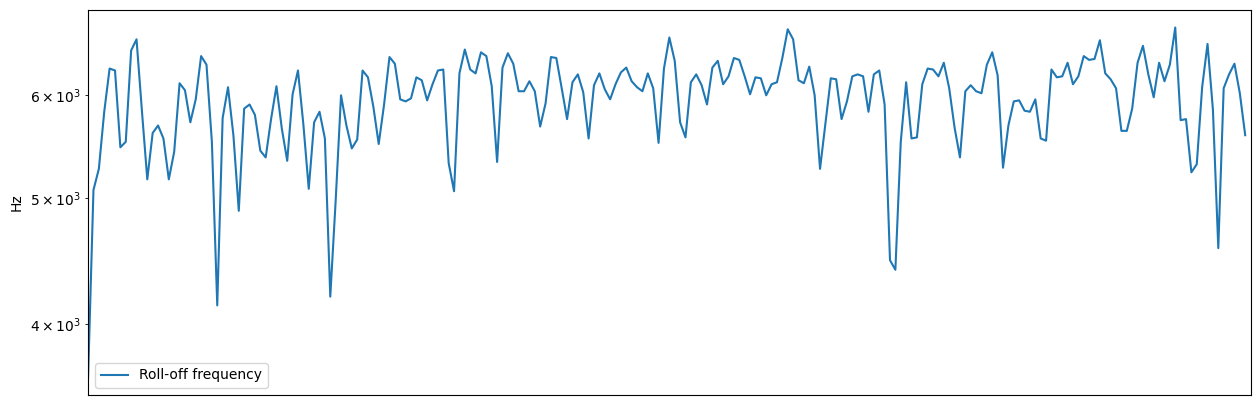

In [122]:
def plt_spectral_rolloff(y, sr):
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  plt.figure(figsize=(15,5))
  plt.semilogy(rolloff.T, label='Roll-off frequency')
  plt.ylabel('Hz')
  plt.xticks([])
  plt.xlim([0, rolloff.shape[-1]])
  plt.legend()

plt_spectral_rolloff(y, sr)
plt_spectral_rolloff(y_human, sr_human)
plt_spectral_rolloff(y_animals, sr_animals)
plt_spectral_rolloff(y_cars, sr_cars)

**Выбор характеристик для извлечения из аудиофайла.**

- Средние значения и стандартные отклонения Мел-кепстральных коэффициентов ( по 20 значений);

- Среднее значение, стандартное отклонение и skew (наклон) Спектрального центроида

- Среднее значение и стандартное отклонение Спектрального спада;

**Мел-кепстральные коэффициенты (MFCC).**

In [125]:
y_harmonic = librosa.effects.hpss(y)[0]
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
mfccs

array([[-639.8808   , -639.8808   , -639.8808   , ..., -168.87875  ,
        -160.90453  , -142.95927  ],
       [   0.       ,    0.       ,    0.       , ...,   29.491299 ,
          38.900898 ,   53.776047 ],
       [   0.       ,    0.       ,    0.       , ...,  -51.99205  ,
         -45.522076 ,  -25.521816 ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,    3.8734086,
           4.20415  ,   -7.1030116],
       [   0.       ,    0.       ,    0.       , ...,  -22.198622 ,
         -19.772923 ,  -17.02467  ],
       [   0.       ,    0.       ,    0.       , ...,   15.413819 ,
          13.356353 ,   12.9129715]], dtype=float32)